# Canonical Correlation Analysis (CCA) with Built-in Dataset

In [21]:
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [11]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
Y = df[['petal length (cm)', 'petal width (cm)']]
print (X) 
print (Y)

     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]
     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1           

In [15]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X_std = scaler1.fit_transform(X)
Y_std = scaler2.fit_transform(Y)


In [16]:
cca = CCA(n_components=1)
cca.fit(X_std, Y_std)

CCA(n_components=1)

In [18]:
X_c, Y_c = cca.transform(X_std, Y_std)
canonical_correlation = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]

print(f"Canonical Correlation: {canonical_correlation:.4f}")

Canonical Correlation: 0.9410


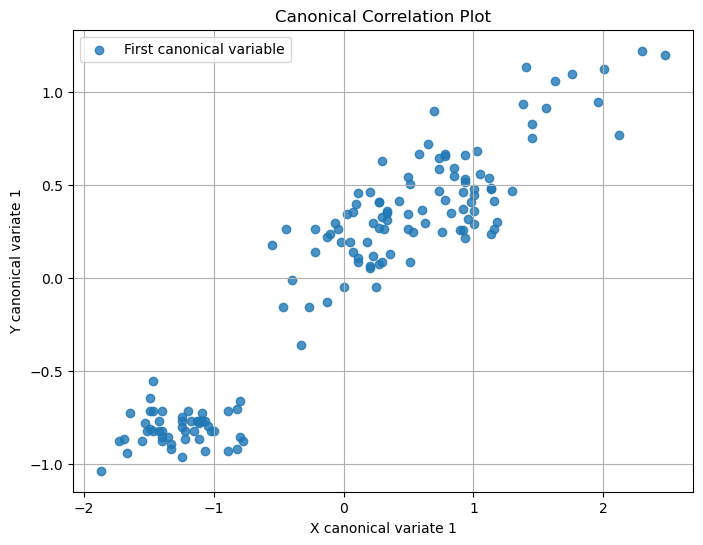

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], label="First canonical variable", alpha=0.8)
plt.xlabel("X canonical variate 1")
plt.ylabel("Y canonical variate 1")
plt.title("Canonical Correlation Plot")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
X_weights = cca.x_weights_
Y_weights = cca.y_weights_

print("\nLoadings for Psychological Variables:")
for i, var in enumerate(X.columns):
    print(f"  {var}: {X_weights[i][0]:.4f}")

print("\nLoadings for Academic Variables:")
for i, var in enumerate(Y.columns):
    print(f"  {var}: {Y_weights[i][0]:.4f}")


Loadings for Psychological Variables:
  sepal length (cm): 0.9217
  sepal width (cm): -0.3880

Loadings for Academic Variables:
  petal length (cm): 0.9430
  petal width (cm): -0.3327
